## The Perceptron

![perceptron](https://www.researchgate.net/profile/Shibani_Singh2/publication/321141639/figure/fig2/AS:572731935727616@1513561342872/Schematic-of-Rosenblatts-perceptron.png)



$$ \hat{y} = f(\mathbf{w} \cdot \mathbf{x}) = f(w_0 + w_1 x_1 + ... + w_m x_m) $$


## Linear Regresion

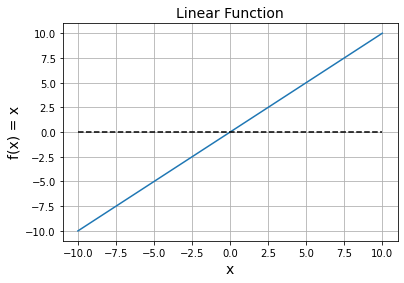

In [20]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-10, 10)
y = x

plt.plot(x, y)
plt.grid(True)
plt.xlabel('x', fontsize=14)
plt.ylabel('f(x) = x', fontsize=14)
plt.title('Linear Function', fontsize=14)
plt.plot(x, np.zeros(len(x)), '--k')
plt.show()

>Linear Function :     $\hat{y} = \mathbf{w} \cdot \mathbf{x}$.

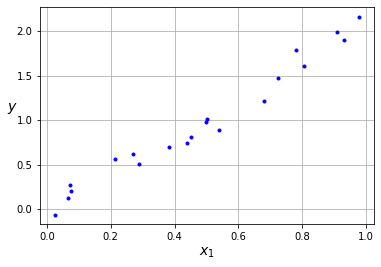

In [2]:
np.random.seed(7)

x = np.random.rand(20)
y = 2*x + (np.random.rand(20)-0.5)*0.5

plt.plot(x, y, "b.")
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.grid(True)
plt.show()

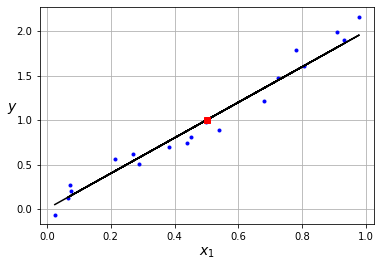

In [3]:
plt.plot(x, y, "b.")
plt.plot(x, 2*x, 'k')
plt.plot(0.5, 2*0.5, 'sr')
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.grid(True)
plt.show()

## The Perceptron

* (MSE) = Mean Square Loss

$$ F(1) = Linear.Function => \hat{y} = \mathbf{w} \cdot \mathbf{x}$$

$$ F(2) = Cost.Function => MSE(\hat{y},y)  = \frac{1}{N} \sum^{N}_{j=1} (\hat{y}^{(j)} - y^{(j)})^2 $$

$$ F(3) = Derivative.of.Cost.Funct => \frac{\partial MSE}{\partial w} = \frac{2}{N} \frac{\partial \hat{y} }{\partial w} (\hat{y} - y)$$

$$ F(4) = Derivative.of.F(1) => \frac{\partial \hat{y}}{\partial w} = x $$

$$ F(5) = Replacing.F(1).and.F(4).in.F(3) => \frac{\partial MSE}{\partial w} = \frac{2}{N} \sum^{N}_{j=1} (w*x^{(j)} - y^{(j)}) * x  $$


![](https://camo.githubusercontent.com/80b245209743990aa244cbae262d15ba16997fbf/68747470733a2f2f6d69726f2e6d656469756d2e636f6d2f6d61782f3630302f312a694e50486343784976636d3752776b52614d547831672e6a706567)

1. Calculate the output of the model, $\hat{y}$.
2. Calculate the derivative of the loss function with respect to the model parameters, $\frac{\partial MSE}{\partial w} = \frac{2}{N} \frac{\partial \hat{y} }{\partial w} (\hat{y} - y) $ where $\frac{\partial \hat{y}}{\partial w} = x$.
3. Update the parameters, $w \leftarrow w - \eta \frac{\partial MSE}{\partial w}$, where $\eta$ is the *learning rate*.
4. Repeat until convergent.

### Other mode

$$ F(1) = Linear.Function => \hat{y} = \mathbf{w} \cdot \mathbf{x}$$

$$ F(2) = Cost.Function => MSE(\hat{y},y)  = \frac{1}{N} \sum^{N}_{j=1} (\hat{y}^{(j)} - y^{(j)})^2 $$

$$ F(3) = Replacing.F(1)in.F(2) => MSE(x,y)  = \frac{1}{N} \sum^{N}_{j=1} (w*x^{(j)} - y^{(j)})^2 $$

$$ F(4) = Derivative.of.F(3) => \frac{\partial MSE}{\partial w} = \frac{2}{N} \sum^{N}_{j=1} (w*x^{(j)} - y^{(j)}) * x  $$

In [4]:
np.random.seed(7)

x = np.random.rand(20)
y = 2*x + (np.random.rand(20)-0.5)*0.5

def gradient(w, x, y): 
    # y = w*x
    dldw = w*x - y ### y' = x*w - y
    dydw = x # derivative of dydw with respect to x = x
    dldw = dldw*dydw # chain rule
    return np.mean(2*dldw) # mean squared error derivative

def cost(y, y_hat): 
    return ((y_hat - y)**2).mean() # mean squared error

def solve(epochs = 50, w = 1.2, lr = 0.2):
    weights = [(w, gradient(w, x, y), cost(x*w, y))]
    for i in range(1,epochs+1):
        dw = gradient(w, x, y)
        w = w - lr*dw
        weights.append((w, dw, cost(x*w, y)))
    return weights

In [5]:
from matplotlib import animation, rc
rc('animation', html='html5')

def init_fig(x, t, ws, cost_ws):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
    ax2.plot(x, t, 'bo', label='y')
    ax2.set_xlim([0, 1])
    ax2.set_ylim([0, 2])
    ax2.set_xlabel('$x$', fontsize=15)
    ax2.set_ylabel('$y$', fontsize=15)
    ax2.yaxis.set_label_position('right')
    ax2.set_title('datos & modelo', fontsize=18)
    line2, = ax2.plot([], [], 'k-', label='$\hat{y}=x*w$')
    ax2.legend(loc=2)
    ax1.plot(ws, cost_ws, 'r-', label='MSE')
    ax1.set_ylim([0, 0.25])
    ax1.set_xlim([1, 2.75])
    ax1.set_xlabel('$w$', fontsize=15)
    ax1.set_ylabel('$MSE = 1 / N \sum (\hat{y}-y)^2$', fontsize=15)
    cost_text = ax1.set_title('$MSE_{}$'.format(0), fontsize=18)
    line1, = ax1.plot([], [], 'k:', label='derivada en $w$')
    pc_dots, = ax1.plot([], [], 'ko')
    ax1.legend(loc=2)
    ax1.grid(True)
    ax2.grid(True)
    return fig, ax1, ax2, line1, line2, pc_dots, cost_text

def get_anim(fig, ax1, ax2, line1, line2, pc_dots, cost_text, weights):
    xs = np.linspace(0, 4, num=100) 
    def anim(i):
        if i == 0:
            return [line1, line2, pc_dots, cost_text]
        (w, dw, cost) = weights[i-1]
        cost_text.set_text('$MSE_{{{}}} = {:.3f}$'.format(i, cost))
        ws, _, cs = zip(*weights[0:i])
        pc_dots.set_xdata(ws)
        pc_dots.set_ydata(cs)
        abline_values = [dw * (x-w) + cost for x in xs]
        line1.set_xdata(xs)
        line1.set_ydata(abline_values)
        # Plot fit
        # plot the fitted line
        line2.set_xdata([0, 1])
        line2.set_ydata([0*w, 1*w])
        ax2.legend(loc=2)
        return [line1, line2, pc_dots, cost_text]
    return anim

ws = np.linspace(0, 4, num=100)  
cost_ws = np.vectorize(lambda w: cost(x*w, y))(ws)  
fig, ax1, ax2, line1, line2, pc_dots, cost_text = init_fig(x, y, ws, cost_ws)

def compute_anim(weights):
    animate = get_anim(fig, ax1, ax2, line1, line2, pc_dots, cost_text, weights)
    anim = animation.FuncAnimation(fig, animate, frames=len(weights)+1, interval=200, blit=True)
    plt.close()
    return anim
    
weights = solve()
anim = compute_anim(weights)
anim

In [6]:
# last weight

w = weights[-1][0]
w

2.0444265320918737

In [7]:
# nerual network prediction

x_new = 0.5
y_new = w*x_new
y_new

1.0222132660459369

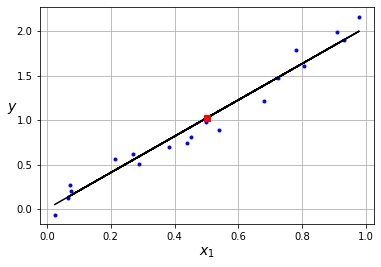

In [8]:
plt.plot(x, y, "b.")
plt.plot(x, w*x, 'k')
plt.plot(0.5, w*0.5, 'sr')
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.grid(True)
plt.show()

## Comparison between different values of W

In [9]:
fig, ax1, ax2, line1, line2, pc_dots, cost_text = init_fig(x, y, ws, cost_ws)
weights = solve(w = 1.2)
anim = compute_anim(weights)
anim

In [10]:
fig, ax1, ax2, line1, line2, pc_dots, cost_text = init_fig(x, y, ws, cost_ws)
weights = solve(w = 1.7)
anim = compute_anim(weights)
anim

In [11]:
fig, ax1, ax2, line1, line2, pc_dots, cost_text = init_fig(x, y, ws, cost_ws)
weights = solve(w = 5)
anim = compute_anim(weights)
anim

## Learning Rates Effects

In [12]:
fig, ax1, ax2, line1, line2, pc_dots, cost_text = init_fig(x, y, ws, cost_ws)
weights = solve(lr = 0.01)
anim = compute_anim(weights)
anim

In [13]:
fig, ax1, ax2, line1, line2, pc_dots, cost_text = init_fig(x, y, ws, cost_ws)
weights = solve(lr = 0.05)
anim = compute_anim(weights)
anim

In [14]:
fig, ax1, ax2, line1, line2, pc_dots, cost_text = init_fig(x, y, ws, cost_ws)
weights = solve(lr = 0.2)
anim = compute_anim(weights)
anim

In [15]:
fig, ax1, ax2, line1, line2, pc_dots, cost_text = init_fig(x, y, ws, cost_ws)
weights = solve(lr = 0.5)
anim = compute_anim(weights)
anim

In [16]:
fig, ax1, ax2, line1, line2, pc_dots, cost_text = init_fig(x, y, ws, cost_ws)
weights = solve(lr = 1)
anim = compute_anim(weights)
anim

In [17]:
fig, ax1, ax2, line1, line2, pc_dots, cost_text = init_fig(x, y, ws, cost_ws)
weights = solve(lr = 2.7)
anim = compute_anim(weights)
anim

We have seen the effect that the *learning rate* has on the training of our `Perceptron`. A very small value results in a slow optimization process, while a very large value will cause the process to diverge. So we will have to use appropriate values ​​to have a fast and convergent optimization. Unfortunately, a "very small" or "very large" or "adequate" value will depend on the loss function and model used, so each case will require several tests to find the best *learning rate* value.

![](https://miro.medium.com/max/918/0*uIa_Dz3czXO5iWyI.)

In all the previous cases we have used all the elements of the dataset in the calculation of the gradient. This is known as `Batch Gradient Descent` and its main limitation is those cases in which the data set is so large that it does not fit in the computer's memory. In these cases we have two alternatives. In the diametrically opposite case, `Stochastic Gradient Descent` calculates the derivative for each dataset element independently. Even so, the most used option is `Mini-Batch Gradient Descent`, method in which we will use a small set of the data to calculate the derivative of the loss function in each iteration.

#### Stochastic Gradient Descent

In [18]:
def solve_sgd(epochs = 5, w = 1.2, lr = 0.2):
    # stochastic gradient descent
    weights = [(w, gradient(w, x, y), cost(x*w, y))]
    for i in range(1,epochs+1):
        # one update for each element of the dataset
        for _x, _y in zip(x, y):
            dw = gradient(w, _x, _y)
            w = w - lr*dw
            weights.append((w, dw, cost(_x*w, _y)))
    return weights

fig, ax1, ax2, line1, line2, pc_dots, cost_text = init_fig(x, y, ws, cost_ws)
weights = solve_sgd()
anim = compute_anim(weights)
anim

#### Mini-Batch Gradient Descent

In [19]:
def solve_mbgd(epochs = 20, w = 1.2, lr = 0.2, batch_size=10):
    # mini-batch gradient descent
    batches = len(x) // batch_size
    weights = [(w, gradient(w, x, y), cost(x*w, y))]
    for i in range(1,epochs+1):
        # one update for each batch of the dataset
        for j in range(batches):
            _x = x[j*batch_size:(j+1)*batch_size]
            _y = y[j*batch_size:(j+1)*batch_size]
            dw = gradient(w, _x, _y)
            w = w - lr*dw
            weights.append((w, dw, cost(_x*w, _y)))
    return weights

fig, ax1, ax2, line1, line2, pc_dots, cost_text = init_fig(x, y, ws, cost_ws)
weights = solve_mbgd()
anim = compute_anim(weights)
anim

![](https://suniljangirblog.files.wordpress.com/2018/12/descent.png?w=908)